# SupplyChian Analysis

### Project Introduction

Supply chains are a vital component of any organization’s success, contributing to meeting market needs and delivering products on time. With the increasing complexity of logistics operations, many companies face significant challenges related to shipping goods. This project aims to analyze supply chain data to determine if there are issues affecting the shipping process.

We will review various factors that may affect shipping efficiency, including delivery times and shipping error rates. A key focus of our analysis will be to ensure that the percentage of delayed shipments does not exceed 5% of the total shipped orders. By maintaining this threshold, we aim to enhance shipping efficiency and customer satisfaction.

Through this analysis, we seek to provide clear insights that help improve logistics operations and enhance customer satisfaction. Understanding shipping issues can greatly contribute to enhancing the operational efficiency and competitiveness of the organization in the market.

Through this project, we aim to provide data-driven recommendations to address any existing issues and ensure smooth operations in the future.


In [ ]:
#Import libraries important for analysis and data loading
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
%matplotlib inline
df = pd.read_csv('/content/SupplyChain.csv', sep=';')
df

,Order_Id,Order_Customer_Id,Order_Date,Order_State,Order_Region,Order_Country,Order_City,Order_Zipcode,Order_Status,Payment_Type,...,Days_for_shipping_real,Days_for_shipment_scheduled,Order_Id3,Product_Card_Id4,Product_Name,Product_Price,Product_Category_Id,Product_Status,Category_Id,Category_Name
0,988,2491,15/01/2015,Managua,Central America,Nicaragua,Managua,NaN,COMPLETE,DEBIT,...,4,4,988,885,Team Golf St. Louis Cardinals Putter Grip,24.99,40,0,40,Accessories
1,992,7107,15/01/2015,San Pedro de Macors,Caribbean,Repblica Dominicana,San Pedro de Macors,NaN,COMPLETE,DEBIT,...,2,1,992,885,Team Golf St. Louis Cardinals Putter Grip,24.99,40,0,40,Accessories
2,1232,11433,18/01/2015,Corts,Central America,Honduras,San Pedro Sula,NaN,PENDING,TRANSFER,...,2,1,1232,885,Team Golf St. Louis Cardinals Putter Grip,24.99,40,0,40,Accessories
3,1282,9392,19/01/2015,Minas Gerais,South America,Brasil,Belo Horizonte,NaN,PENDING_PAYMENT,PAYMENT,...,2,1,1282,885,Team Golf St. Louis Cardinals Putter Grip,24.99,40,0,40,Accessories
4,1560,7542,23/01/2015,Santiago de Chile,Caribbean,Repblica Dominicana,Santiago de los Caballeros,NaN,CLOSED,CASH,...,6,4,1560,885,Team Golf St. Louis Cardinals Putter Grip,24.99,40,0,40,Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180511,66452,10463,28/08/2017,Normanda,Western Europe,Francia,Le PetitQuevilly,NaN,SUSPECTED_FRAUD,TRANSFER,...,3,4,66452,691,MDGolf Pittsburgh Penguins Putter,79.99,31,0,31,Women's Golf Clubs
180512,66475,4848,28/08/2017,Madrid,Southern Europe,Espaa,Madrid,NaN,PENDING_PAYMENT,PAYMENT,...,6,4,66475,691,MDGolf Pittsburgh Penguins Putter,79.99,31,0,31,Women's Golf Clubs
180513,66593,7678,30/08/2017,Apulia,Southern Europe,Italia,Molfetta,NaN,COMPLETE,DEBIT,...,4,2,66593,691,MDGolf Pittsburgh Penguins Putter,79.99,31,0,31,Women's Golf Clubs
180514,66677,1591,31/08/2017,Dubln,Northern Europe,Irlanda,Dubln,NaN,CLOSED,CASH,...,3,4,66677,691,MDGolf Pittsburgh Penguins Putter,79.99,31,0,31,Women's Golf Clubs


In [ ]:
df.columns

Index(['Order_Id', 'Order_Customer_Id', 'Order_Date', 'Order_State',
       'Order_Region', 'Order_Country', 'Order_City', 'Order_Zipcode',
       'Order_Status', 'Payment_Type', 'Order_Item_Id', 'Order_Id.1',
       'Product_Card_Id', 'Order_Item_Product_Price', 'Order_Item_Quantity',
       'Order_Item_Discount', 'Order_Item_Discount_Rate', 'Order_Item_Total',
       'Order_Profit_Per_Order', 'Order_Item_Profit_Ratio', 'Shipping_Mode',
       'Shipping_Date', 'Late_Delivery_Risk', 'Days_for_shipping_real',
       'Days_for_shipment_scheduled', 'Order_Id.2', 'Product_Card_Id.1',
       'Product_Name', 'Product_Price', 'Product_Category_Id',
       'Product_Status', 'Category_Id', 'Category_Name'],
      dtype='object')

In [ ]:
import pandas as pd

# حساب عدد الصفوف والأعمدة
num_rows = df.shape[0]
num_cols = df.shape[1]

print(f"عدد الصفوف: {num_rows}")
print(f"عدد الأعمدة: {num_cols}")

# حساب عدد الخلايا الفارغة
num_nulls = df.isnull().sum().sum()
print(f"عدد الخلايا الفارغة: {num_nulls}")

# حساب عدد الصفوف المكررة
num_duplicates = df.duplicated().sum()
print(f"عدد الصفوف المكررة: {num_duplicates}")

عدد الصفوف: 180516
عدد الأعمدة: 33
عدد الخلايا الفارغة: 180516
عدد الصفوف المكررة: 0


# Step 1: Explore the data
In this step we will display all the data and all the information related to it to reach a deep understanding of what the data is.

In [ ]:
#Display rows of data for a quick look at the data.
df.head(5)

,Order_Id,Order_Customer_Id,Order_Date,Order_State,Order_Region,Order_Country,Order_City,Order_Zipcode,Order_Status,Payment_Type,...,Days_for_shipping_real,Days_for_shipment_scheduled,Order_Id.2,Product_Card_Id.1,Product_Name,Product_Price,Product_Category_Id,Product_Status,Category_Id,Category_Name
0,988,2491,15/01/2015,Managua,Central America,Nicaragua,Managua,NaN,COMPLETE,DEBIT,...,4,4,988,885,Team Golf St. Louis Cardinals Putter Grip,24.99,40,0,40,Accessories
1,992,7107,15/01/2015,San Pedro de Macors,Caribbean,Repblica Dominicana,San Pedro de Macors,NaN,COMPLETE,DEBIT,...,2,1,992,885,Team Golf St. Louis Cardinals Putter Grip,24.99,40,0,40,Accessories
2,1232,11433,18/01/2015,Corts,Central America,Honduras,San Pedro Sula,NaN,PENDING,TRANSFER,...,2,1,1232,885,Team Golf St. Louis Cardinals Putter Grip,24.99,40,0,40,Accessories
3,1282,9392,19/01/2015,Minas Gerais,South America,Brasil,Belo Horizonte,NaN,PENDING_PAYMENT,PAYMENT,...,2,1,1282,885,Team Golf St. Louis Cardinals Putter Grip,24.99,40,0,40,Accessories
4,1560,7542,23/01/2015,Santiago de Chile,Caribbean,Repblica Dominicana,Santiago de los Caballeros,NaN,CLOSED,CASH,...,6,4,1560,885,Team Golf St. Louis Cardinals Putter Grip,24.99,40,0,40,Accessories


In [ ]:
#Show data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180516 entries, 0 to 180515
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Order_Id                     180516 non-null  int64  
 1   Order_Customer_Id            180516 non-null  int64  
 2   Order_Date                   180516 non-null  object 
 3   Order_State                  180516 non-null  object 
 4   Order_Region                 180516 non-null  object 
 5   Order_Country                180516 non-null  object 
 6   Order_City                   180516 non-null  object 
 7   Order_Zipcode                0 non-null       float64
 8   Order_Status                 180516 non-null  object 
 9   Payment_Type                 180516 non-null  object 
 10  Order_Item_Id                180516 non-null  int64  
 11  Order_Id.1                   180516 non-null  int64  
 12  Product_Card_Id              180516 non-null  int64  
 13 

In [ ]:
#View a statistical summary to get a clearer idea of the data.
df.describe()

,Order_Id,Order_Customer_Id,Order_Zipcode,Order_Item_Id,Order_Id.1,Product_Card_Id,Order_Item_Product_Price,Order_Item_Quantity,Order_Item_Discount,Order_Item_Discount_Rate,...,Order_Item_Profit_Ratio,Late_Delivery_Risk,Days_for_shipping_real,Days_for_shipment_scheduled,Order_Id.2,Product_Card_Id.1,Product_Price,Product_Category_Id,Product_Status,Category_Id
count,180516.000000,180516.000000,0.0,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,...,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.0,180516.000000
mean,36221.305098,6691.237015,NaN,90258.591261,36221.305098,692.498759,141.231294,2.127656,20.664413,0.101667,...,0.120644,0.548295,3.497657,2.931845,36221.305098,692.498759,141.231294,31.850855,0.0,31.850855
std,21045.056389,4162.802258,NaN,52110.777899,21045.056389,336.438773,139.732275,1.453456,21.800633,0.070415,...,0.466799,0.497664,1.623731,1.374449,21045.056389,336.438773,139.732275,15.639498,0.0,15.639498
min,1.000000,1.000000,NaN,1.000000,1.000000,19.000000,9.990000,1.000000,0.000000,0.000000,...,-2.750000,0.000000,0.000000,0.000000,1.000000,19.000000,9.990000,2.000000,0.0,2.000000
25%,18056.000000,3258.000000,NaN,45129.750000,18056.000000,403.000000,50.000000,1.000000,5.400000,0.040000,...,0.080000,0.000000,2.000000,2.000000,18056.000000,403.000000,50.000000,18.000000,0.0,18.000000
50%,36140.000000,6456.500000,NaN,90258.500000,36140.000000,627.000000,59.990000,1.000000,14.000000,0.100000,...,0.270000,1.000000,3.000000,4.000000,36140.000000,627.000000,59.990000,29.000000,0.0,29.000000
75%,54144.000000,9779.000000,NaN,135387.250000,54144.000000,1004.000000,199.990000,3.000000,29.990000,0.160000,...,0.360000,1.000000,5.000000,4.000000,54144.000000,1004.000000,199.990000,45.000000,0.0,45.000000
max,77204.000000,20757.000000,NaN,180519.000000,77204.000000,1363.000000,1999.990000,5.000000,500.000000,0.250000,...,0.500000,1.000000,6.000000,4.000000,77204.000000,1363.000000,1999.990000,76.000000,0.0,76.000000


In [ ]:
df['Order_Country'] = df['Order_Country'].replace('EE.UU.', 'USA')

array([[<Axes: title={'center': 'Order_Id'}>,
        <Axes: title={'center': 'Order_Customer_Id'}>,
        <Axes: title={'center': 'Order_Zipcode'}>,
        <Axes: title={'center': 'Order_Item_Id'}>,
        <Axes: title={'center': 'Order_Id.1'}>],
       [<Axes: title={'center': 'Product_Card_Id'}>,
        <Axes: title={'center': 'Order_Item_Product_Price'}>,
        <Axes: title={'center': 'Order_Item_Quantity'}>,
        <Axes: title={'center': 'Order_Item_Discount'}>,
        <Axes: title={'center': 'Order_Item_Discount_Rate'}>],
       [<Axes: title={'center': 'Order_Item_Total'}>,
        <Axes: title={'center': 'Order_Profit_Per_Order'}>,
        <Axes: title={'center': 'Order_Item_Profit_Ratio'}>,
        <Axes: title={'center': 'Late_Delivery_Risk'}>,
        <Axes: title={'center': 'Days_for_shipping_real'}>],
       [<Axes: title={'center': 'Days_for_shipment_scheduled'}>,
        <Axes: title={'center': 'Order_Id.2'}>,
        <Axes: title={'center': 'Product_Card_Id.1'

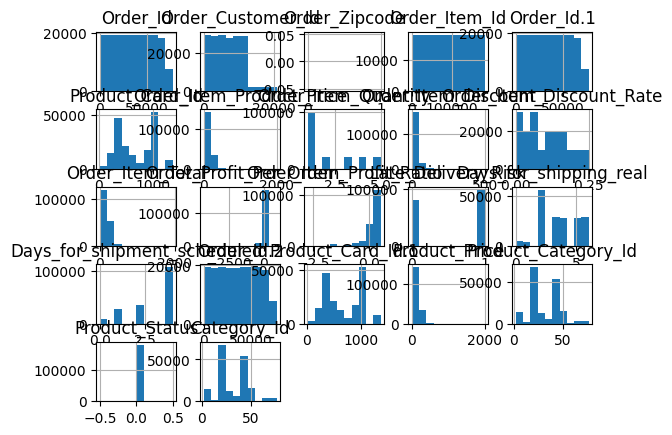

In [ ]:
df.hist()

# Step 2: Clean and process data
In this step, we will delete unnecessary data and redundant columns, in addition to processing duplicate data and adding important data to the analysis client.

In [ ]:
#Delete unnecessary columns
column=['Order_Item_Id','Product_Card_Id',
        'Product_Card_Id','Product_Status','Order_Item_Product_Price']
df.drop(columns=column,inplace=True)

In [ ]:
#Correct data type
df['Shipping_Date']=pd.to_datetime(df['Shipping_Date'])

<ipython-input-3-1e0dab171565>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Shipping_Date']=pd.to_datetime(df['Shipping_Date'])


In [ ]:
#Check for duplicate data
df.duplicated().sum()

0

    Shipping_Mode  Late_Delivery_Risk
0     First Class               26512
1        Same Day                4454
2    Second Class               26987
3  Standard Class               41023


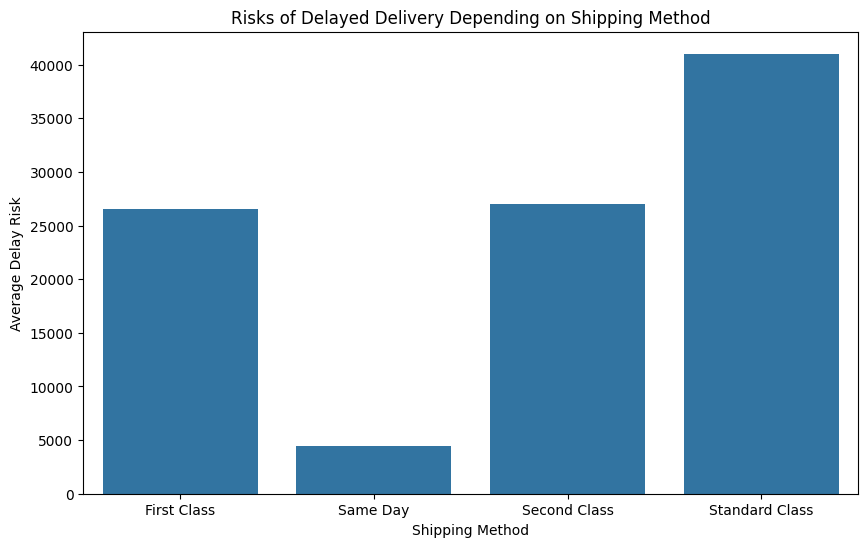

In [ ]:
# Query to get the risks associated with late delivery
shipping_mode_risk = df.query('Late_Delivery_Risk == 1')

# Grouping data by shipping mode and summing the risks
shipping_mode_risk = shipping_mode_risk.groupby('Shipping_Mode')['Late_Delivery_Risk'].sum().reset_index()

# Printing the results
print(shipping_mode_risk)

# Bar plot for risks by shipping mode
plt.figure(figsize=(10, 6))
sns.barplot(x='Shipping_Mode', y='Late_Delivery_Risk', data=shipping_mode_risk)
plt.title('Risks of Delayed Delivery Depending on Shipping Method')
plt.xlabel('Shipping Method')
plt.ylabel('Average Delay Risk')
plt.show()


In [ ]:
df.to_csv('cleaned_data.csv', index=False)

# Exploratory Data Analysis

Is there a problem with the shipping?

In [ ]:
#Explore the percentage of delay in shipping orders
delay=round(df['Late_Delivery_Risk'][df['Late_Delivery_Risk']==0].count()/len(df['Late_Delivery_Risk'])*100,1)
print(f'Percentage of orders  that were delayed:- {delay}%')



Percentage of orders  that were delayed:- 45.2%


## Analysis of possible causes of delay





What is the most delayed shipping mode?

Is there a relationship between payment type and the risk of late delivery?*

  Payment_Type  Late_Delivery_Risk
0         CASH              1183.0
1        DEBIT              4138.0
2      PAYMENT              2536.0
3     TRANSFER              2699.0


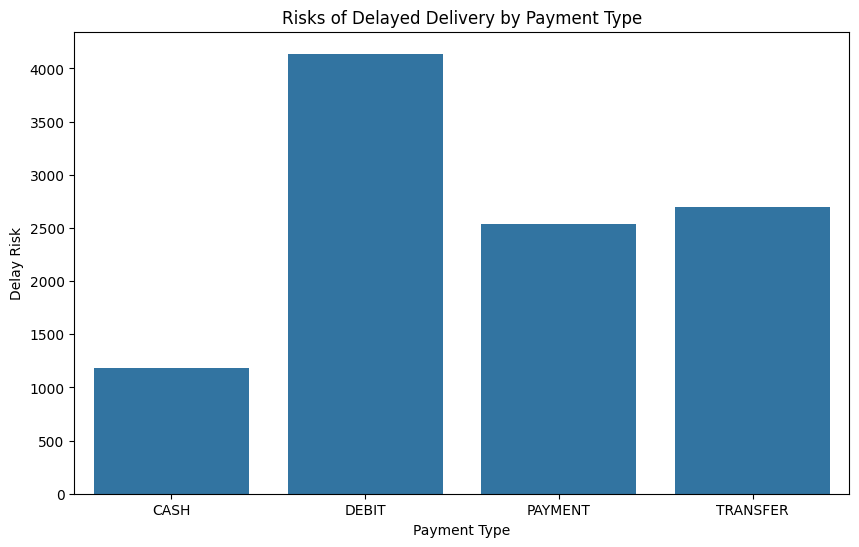

In [ ]:

# Query to get the risks associated with late delivery
shipping_mode_risk = df.query('Late_Delivery_Risk == 1')

# Grouping data by payment type and calculating the average late delivery risk
payment_type_risk = shipping_mode_risk.groupby('Payment_Type')['Late_Delivery_Risk'].sum().reset_index()

# Printing the results
print(payment_type_risk)

# Creating a bar plot for risks by payment type
plt.figure(figsize=(10, 6))
sns.barplot(x='Payment_Type', y='Late_Delivery_Risk', data=payment_type_risk)
plt.title('Risks of Delayed Delivery by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Delay Risk')
plt.show()


What is the relationship between actual and scheduled shipping days? Are there regular delays?

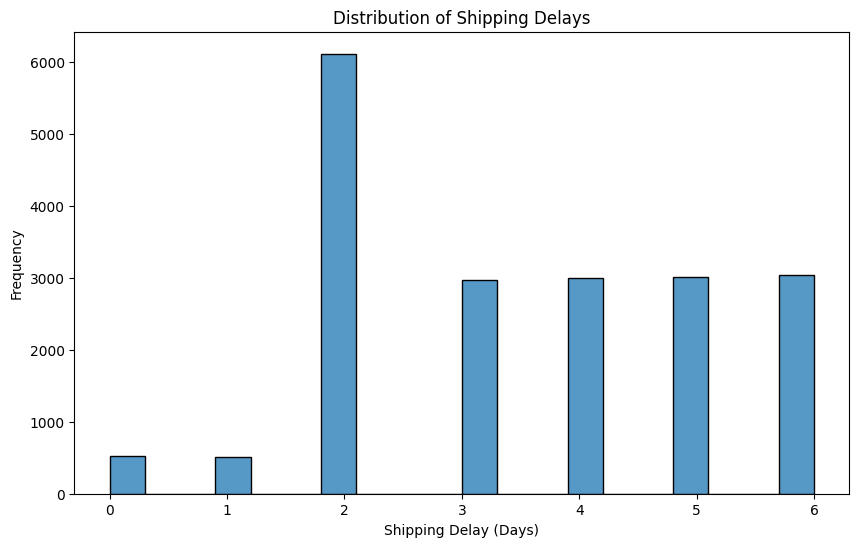

Average Shipping Delay: 3.49 days
Number of orders with significant delays: 3031


In [ ]:
df['Shipping_Delay'] = df['Days_for_shipping_real']


plt.figure(figsize=(10, 6))
sns.histplot(df['Shipping_Delay'], bins=20)
plt.title('Distribution of Shipping Delays')
plt.xlabel('Shipping Delay (Days)')
plt.ylabel('Frequency')
plt.show()

average_delay = df['Shipping_Delay'].mean()
print(f"Average Shipping Delay: {average_delay:.2f} days")

delayed_orders = df[df['Shipping_Delay'] > 5]  # Set a threshold for significant delay, e.g., 5 days
print(f"Number of orders with significant delays: {len(delayed_orders)}")

Does geographical location affect shipment delays?

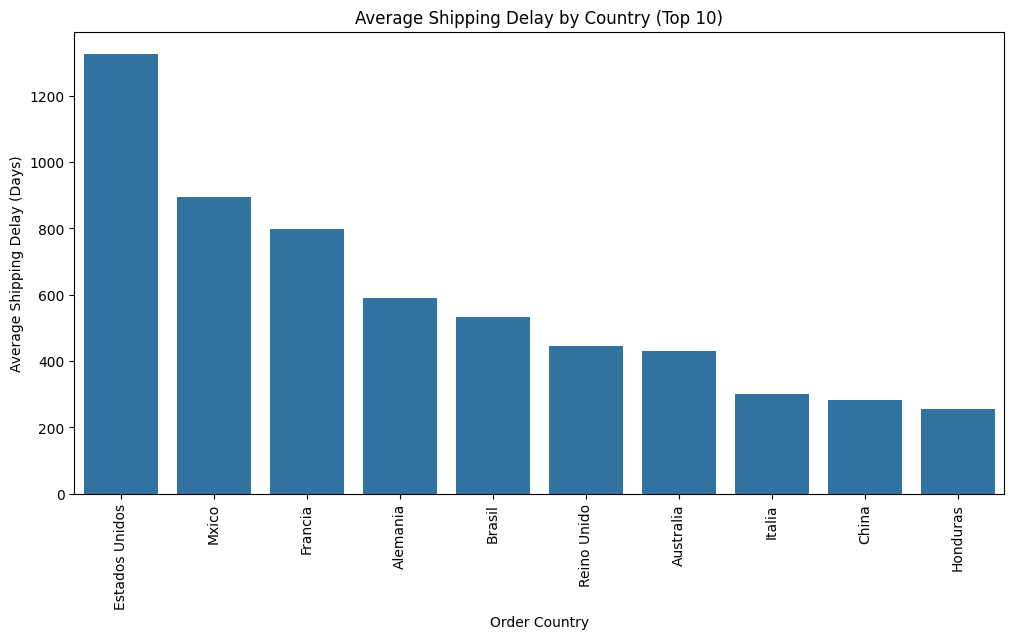

In [ ]:

# Calculate average shipping delay per country
country_delay = shipping_mode_risk.groupby('Order_Country')['Late_Delivery_Risk'].sum().reset_index()

# Get top 10 countries with highest average delays
top_10_countries = country_delay.sort_values(by='Late_Delivery_Risk', ascending=False).head(10)['Order_Country'].tolist()

# Filter the data to include only the top 10 countries
filtered_df = df[df['Order_Country'].isin(top_10_countries)]
plt.figure(figsize=(12, 6))
sns.barplot(x='Order_Country', y='Late_Delivery_Risk', data=country_delay.sort_values(by='Late_Delivery_Risk', ascending=False).head(10))
plt.title('Average Shipping Delay by Country (Top 10)')
plt.xlabel('Order Country')
plt.ylabel('Average Shipping Delay (Days)')
plt.xticks(rotation=90)
plt.show()

In [ ]:

# تجميع البيانات حسب الدولة وطريقة الدفع
payment_methods_by_country = df.groupby(['Order_Country', 'Payment_Type'])['Order_Id'].count().reset_index()

# عرض النتائج
print(payment_methods_by_country)

    Order_Country Payment_Type  Order_Id
0       Afganistn         CASH        23
1       Afganistn        DEBIT        37
2       Afganistn      PAYMENT        58
3       Afganistn     TRANSFER        45
4         Albania         CASH         2
..            ...          ...       ...
574        Zambia     TRANSFER        64
575      Zimbabue         CASH        22
576      Zimbabue        DEBIT        52
577      Zimbabue      PAYMENT        64
578      Zimbabue     TRANSFER        52

[579 rows x 3 columns]


Does the order status affect the delay?

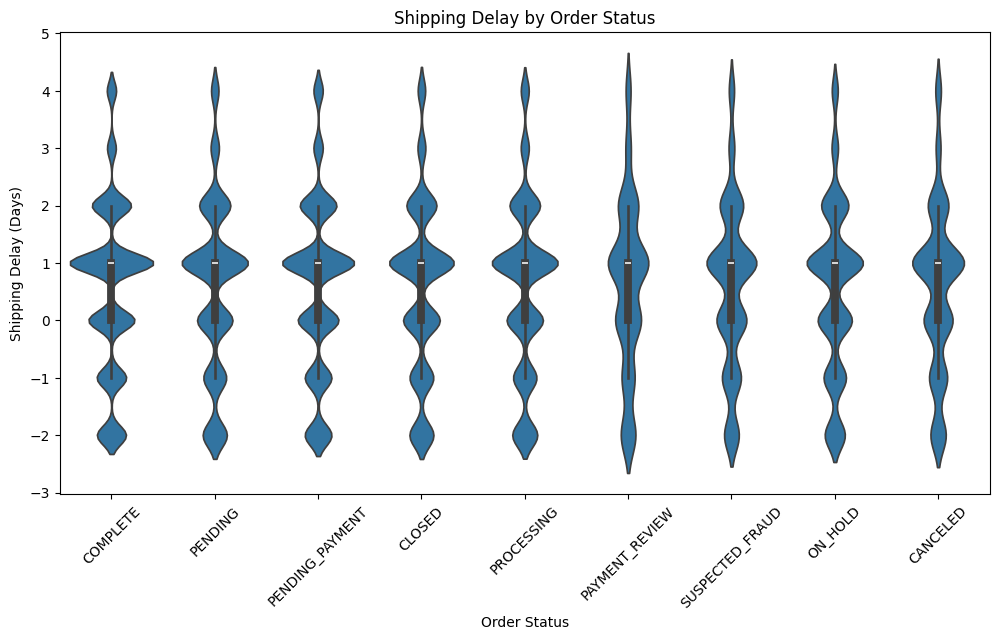

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Order_Status', y='Shipping_Delay', data=df)
plt.title('Shipping Delay by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Shipping Delay (Days)')
plt.xticks(rotation=45)
plt.show()

Does the condition of the product affect the delay?

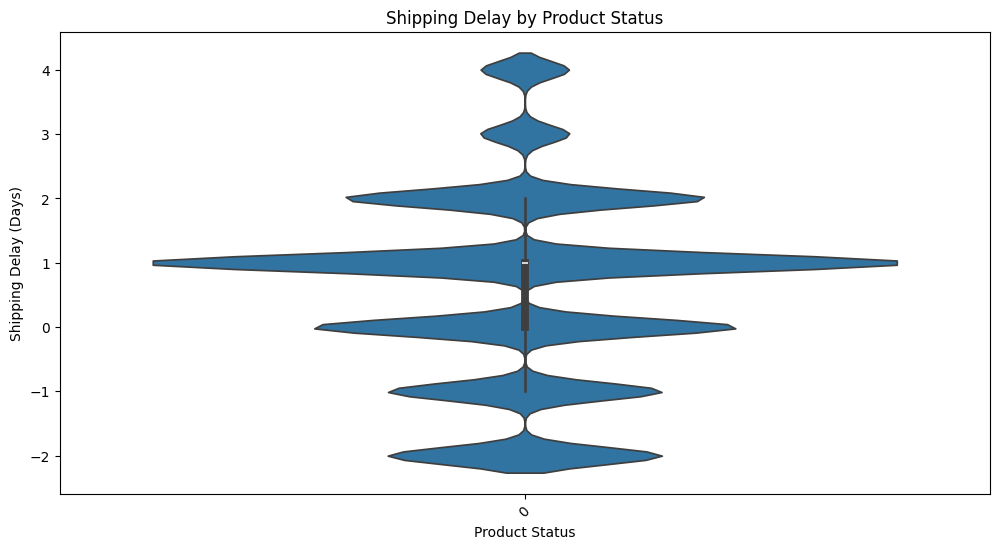

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Product_Status', y='Shipping_Delay', data=df)
plt.title('Shipping Delay by Product Status')
plt.xlabel('Product Status')
plt.ylabel('Shipping Delay (Days)')
plt.xticks(rotation=45)
plt.show()

What is the difference between actual and scheduled shipping?

        Order_Country  Days_for_shipping_real  Days_for_shipment_scheduled
138       Suazilandia                6.000000                          4.0
25               Butn                6.000000                          4.0
132  Shara Occidental                6.000000                          4.0
44            Eritrea                6.000000                          4.0
83               Laos                5.833333                          4.0


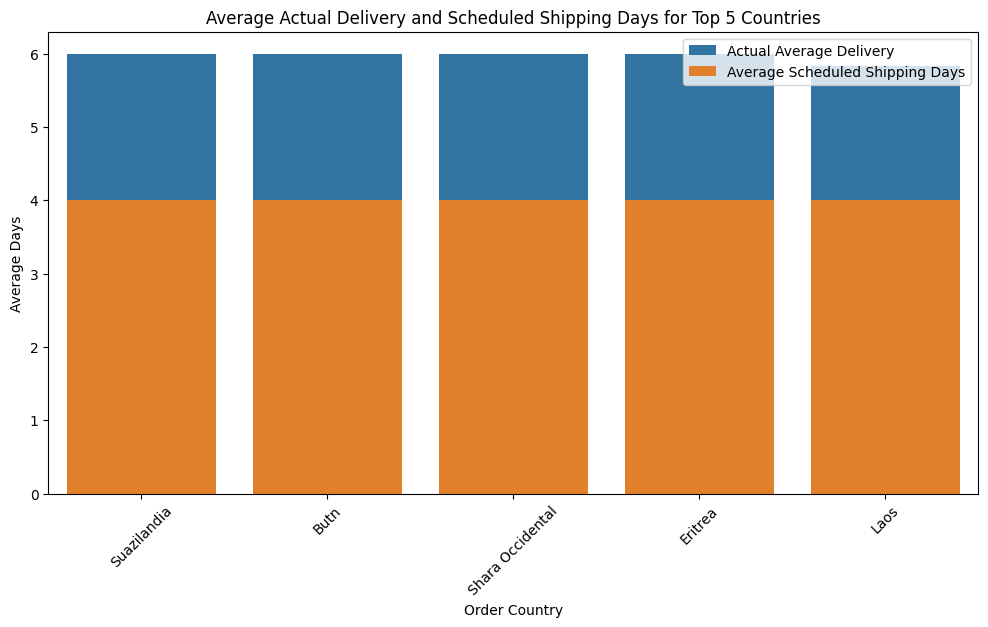

In [ ]:

   # Assuming 'df' is your DataFrame
country_shipping_avg = df.groupby('Order_Country')[['Days_for_shipping_real', 'Days_for_shipment_scheduled']].mean().reset_index()

top5_countries = country_shipping_avg.sort_values(by=['Days_for_shipping_real'], ascending=False).head(5)

print(top5_countries[['Order_Country', 'Days_for_shipping_real', 'Days_for_shipment_scheduled']])

plt.figure(figsize=(12, 6))
sns.barplot(x='Order_Country', y='Days_for_shipping_real', data=top5_countries, label='Actual Average Delivery')
sns.barplot(x='Order_Country', y='Days_for_shipment_scheduled', data=top5_countries, label='Average Scheduled Shipping Days')
plt.title('Average Actual Delivery and Scheduled Shipping Days for Top 5 Countries')
plt.xlabel('Order Country')
plt.ylabel('Average Days')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()
plt.show()

What is the pattern of requests over the year?

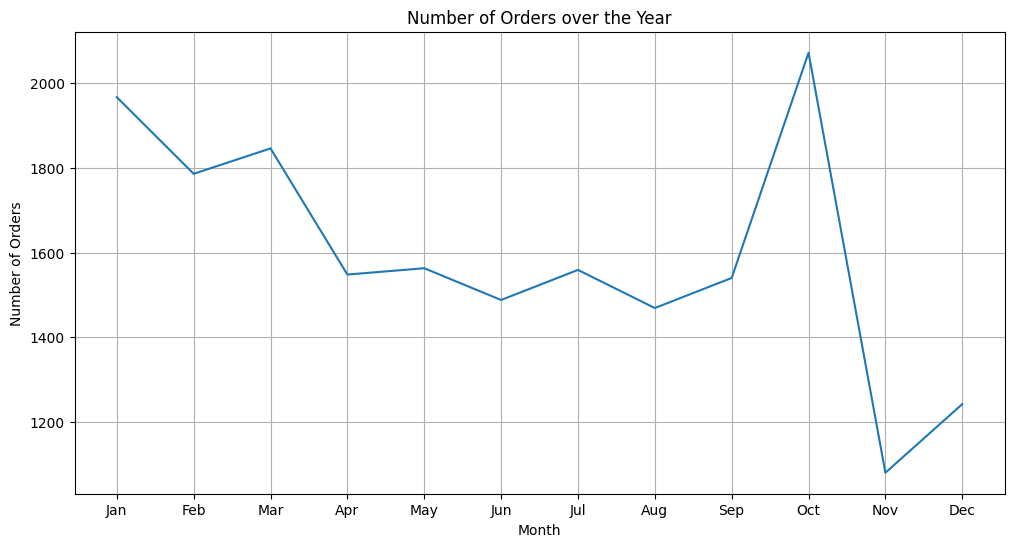

In [ ]:

# Convert 'Order_Date' to datetime objects if it's not already
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Extract the month from the 'Order_Date' column
df['Order_Month'] = df['Order_Date'].dt.month

# Group by month and count the number of orders
orders_by_month = df.groupby('Order_Month')['Order_Id'].count().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(orders_by_month['Order_Month'], orders_by_month['Order_Id'])
plt.title('Number of Orders over the Year')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set x-axis labels to month names
plt.grid(True)  # Add a grid for better readability
plt.show()

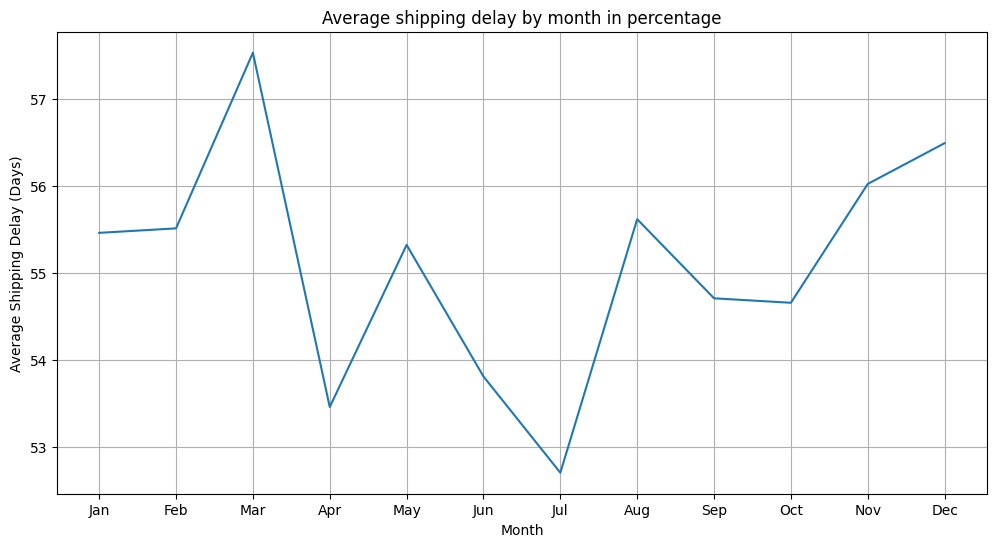

In [ ]:
df['Shipping_Date'] = pd.to_datetime(df['Shipping_Date'])
df['Shipping_Month'] = df['Shipping_Date'].dt.month
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Calculate Shipping_Delay
df['Shipping_Delay'] = (df['Days_for_shipping_real'] - df['Days_for_shipment_scheduled'])


# Then proceed with the original code:
df['Shipping_Date'] = pd.to_datetime(df['Shipping_Date'])
df['Shipping_Month'] = df['Shipping_Date'].dt.month
delay_by_month = (df.groupby('Shipping_Month')['Late_Delivery_Risk'].mean()*100).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(delay_by_month['Shipping_Month'], delay_by_month['Late_Delivery_Risk'])
plt.title('Average shipping delay by month in percentage')
plt.xlabel('Month')
plt.ylabel('Average Shipping Delay (Days)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set x-axis labels to month names
plt.grid(True)  # Add a grid for better readability
plt.show()

What percentage of  types are at risk of late delivery?

Percentage of orders at risk of delayed delivery: 44.9%
Types of orders at risk of delayed delivery: [ 992 1232 1282 ... 5182 5194 5219]


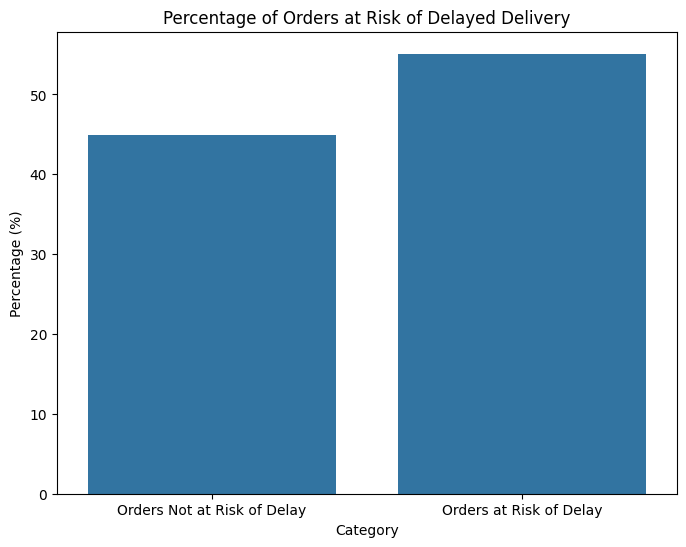

In [ ]:

# Calculate the percentage of orders at risk of delayed delivery
delayed_orders_percentage = round(df['Late_Delivery_Risk'][df['Late_Delivery_Risk'] == 1].count() / len(df['Late_Delivery_Risk']) * 100, 1)
print(f'Percentage of orders at risk of delayed delivery: {100-delayed_orders_percentage}%')

# Get unique order types at risk of delayed delivery
delayed_order_types = df[df['Late_Delivery_Risk'] == 1]['Order_Id'].unique()
print(f'Types of orders at risk of delayed delivery: {delayed_order_types}')

# Create a DataFrame for the bar chart
data = {
    'Category': ['Orders Not at Risk of Delay', 'Orders at Risk of Delay'],
    'Percentage': [100 - delayed_orders_percentage, delayed_orders_percentage]
}
df_viz = pd.DataFrame(data)

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Percentage', data=df_viz)
plt.title('Percentage of Orders at Risk of Delayed Delivery')
plt.ylabel('Percentage (%)')
plt.show()


What are the most popular orders with the highest and lowest sales by date?

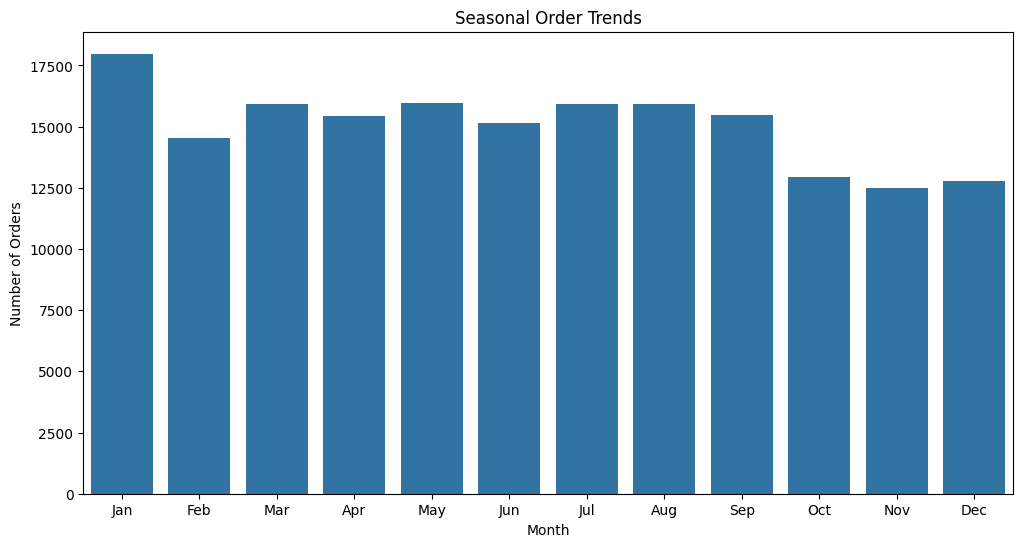

In [ ]:
   # Convert 'Order_Date' to datetime objects if it's not already
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

   # Extract the month from the 'Order_Date' column
df['Order_Month'] = df['Order_Date'].dt.month

plt.figure(figsize=(12, 6))
sns.barplot(x='Order_Month', y='Order_Id', data=orders_by_month)
plt.title('Seasonal Order Trends')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set x-axis labels to month names
plt.show()

Highest sales month: 1, with 17979 orders
Lowest sales month: 11, with 12499 orders


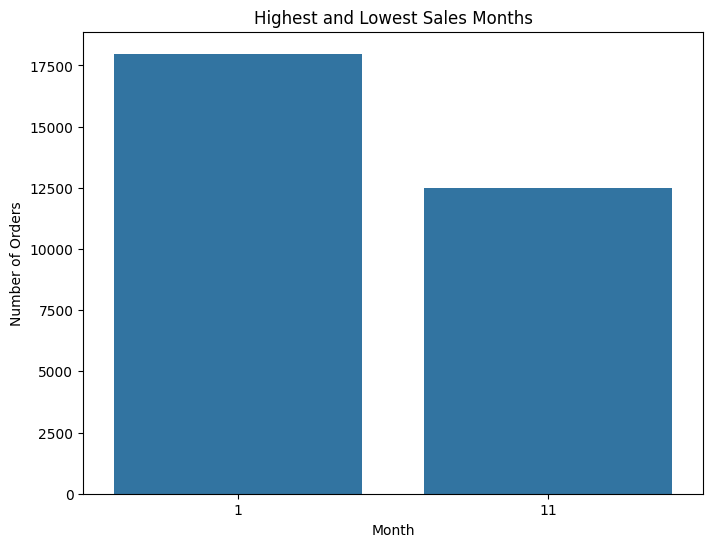

In [ ]:


   # Assuming 'df' is your DataFrame and 'Order_Date' is the column containing order dates

   # Convert 'Order_Date' to datetime objects if it's not already
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

   # Extract the month from the 'Order_Date' column
df['Order_Month'] = df['Order_Date'].dt.month

orders_by_month = df.groupby('Order_Month')['Order_Id'].count().reset_index()

highest_sales_month = orders_by_month.loc[orders_by_month['Order_Id'].idxmax()]
lowest_sales_month = orders_by_month.loc[orders_by_month['Order_Id'].idxmin()]

print(f"Highest sales month: {highest_sales_month['Order_Month']}, with {highest_sales_month['Order_Id']} orders")
print(f"Lowest sales month: {lowest_sales_month['Order_Month']}, with {lowest_sales_month['Order_Id']} orders")

# Assuming 'orders_by_month', 'highest_sales_month', and 'lowest_sales_month' are already calculated

# Create a DataFrame for the bar chart
data = {'Month': [highest_sales_month['Order_Month'], lowest_sales_month['Order_Month']],
        'Number of Orders': [highest_sales_month['Order_Id'], lowest_sales_month['Order_Id']]}
df_viz = pd.DataFrame(data)

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Month', y='Number of Orders', data=df_viz)
plt.title('Highest and Lowest Sales Months')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(range(2), [highest_sales_month['Order_Month'], lowest_sales_month['Order_Month']])  # Set x-axis ticks to month numbers
plt.show()

Which regions or countries have the highest number of requests?

        Order_Region   Order_Country  Order_Id
163   Western Europe         Francia     13221
22   Central America           Mxico     13172
160   Western Europe        Alemania      9564
76           Oceania       Australia      8497
159     West of USA   Estados Unidos      7993
81     South America          Brasil      7987
74   Northern Europe     Reino Unido      7301
44       East of USA  Estados Unidos      6915
126       US Center   Estados Unidos      5887
45      Eastern Asia           China      5758


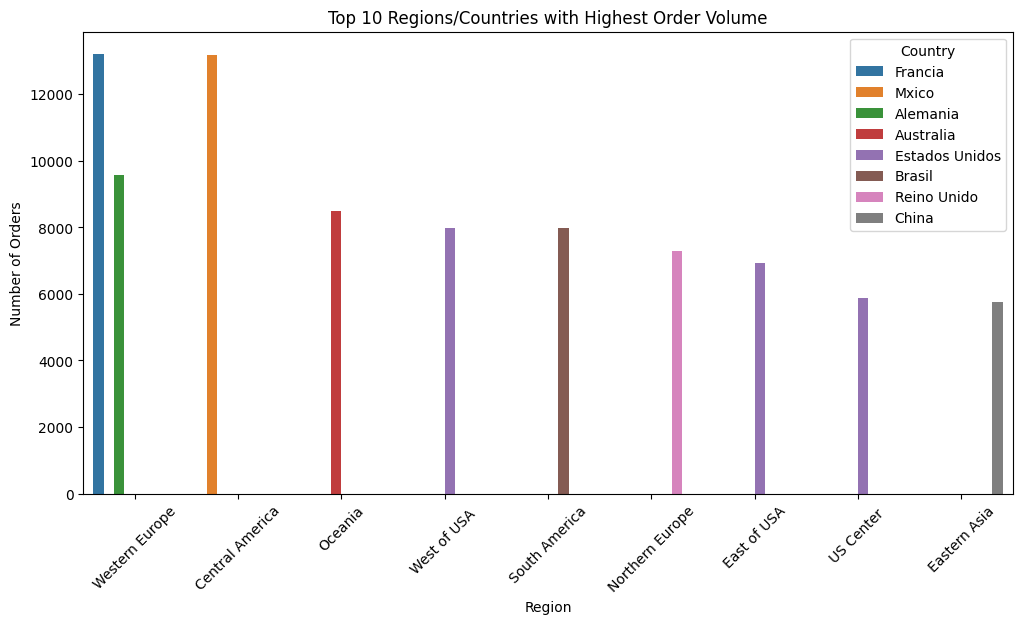

In [ ]:
# Assuming 'df' is your DataFrame
orders_by_region_country = df.groupby(['Order_Region', 'Order_Country'])['Order_Id'].count().reset_index()

orders_by_region_country = orders_by_region_country.sort_values(by=['Order_Id'], ascending=False)

print(orders_by_region_country.head(10))  # Display top 10 regions/countries

top_regions_countries = orders_by_region_country.head(10)
top_regions_countries
plt.figure(figsize=(12, 6))
sns.barplot(x='Order_Region', y='Order_Id', hue='Order_Country', data=top_regions_countries)
plt.title('Top 10 Regions/Countries with Highest Order Volume')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Country', loc='upper right')
plt.show()

How do orders differ depending on the payment type used?

What is the total number of customers who have placed an order?
What is the average number of orders per customer?

In [ ]:
# Assuming 'df' is your DataFrame
total_customers = df['Order_Customer_Id'].nunique()
print(f"Total number of customers who placed orders: {total_customers}")

average_orders_per_customer = df.groupby('Order_Customer_Id')['Order_Id'].count().mean()
print(f"Average number of orders per customer: {average_orders_per_customer:.2f}")


Total number of customers who placed orders: 20649
Average number of orders per customer: 8.74


What cities do your customers come from?

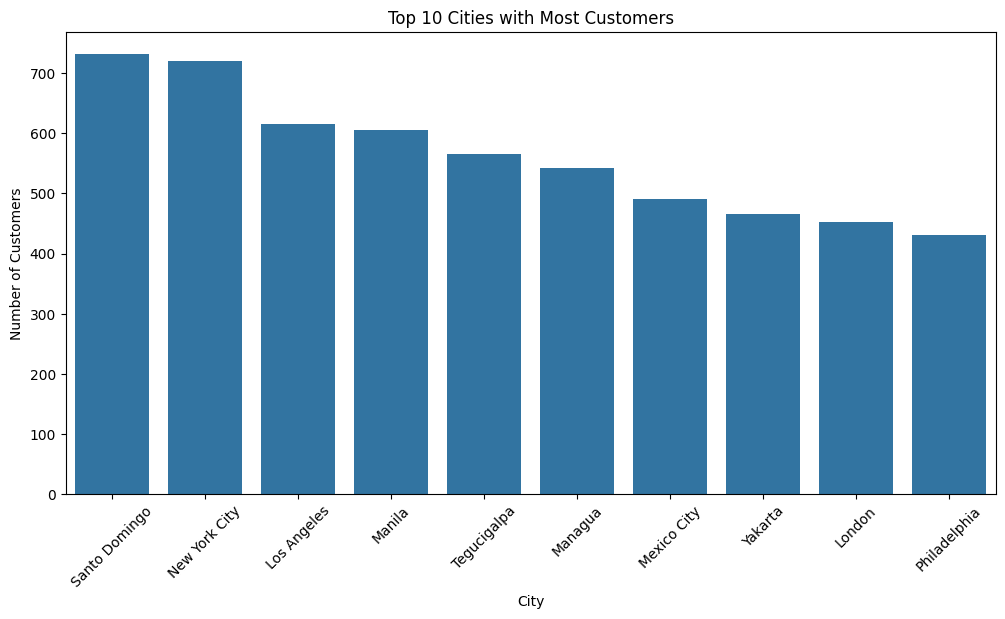

In [ ]:
# Assuming 'df' is your DataFrame
customers_by_city = df.groupby('Order_City')['Order_Customer_Id'].nunique().reset_index()

customers_by_city = customers_by_city.sort_values(by=['Order_Customer_Id'], ascending=False)

top_cities = customers_by_city.head(10)  # Select top 10 cities

plt.figure(figsize=(12, 6))
sns.barplot(x='Order_City', y='Order_Customer_Id', data=top_cities)
plt.title('Top 10 Cities with Most Customers')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

What are customer purchasing patterns based on geographic location?

         Order_Region        Order_Country     Order_City  Order_Count
374       East of USA       Estados Unidos  New York City          222
2187     West of USA        Estados Unidos    Los Angeles          194
70          Caribbean  Repblica Dominicana  Santo Domingo          153
1589   Southeast Asia            Filipinas         Manila          145
134   Central America             Honduras    Tegucigalpa          143
...               ...                  ...            ...          ...
1931       US Center        Estados Unidos       Pearland            1
666    Eastern Europe              Rumania          Roman            1
1933       US Center        Estados Unidos          Pharr            1
1935       US Center        Estados Unidos    Port Arthur            1
0              Canada               Canada     Abbotsford            1

[2730 rows x 4 columns]
         Order_Region   Order_Country          Order_City  Order_Total
1293    South America       Venezuela           Barc

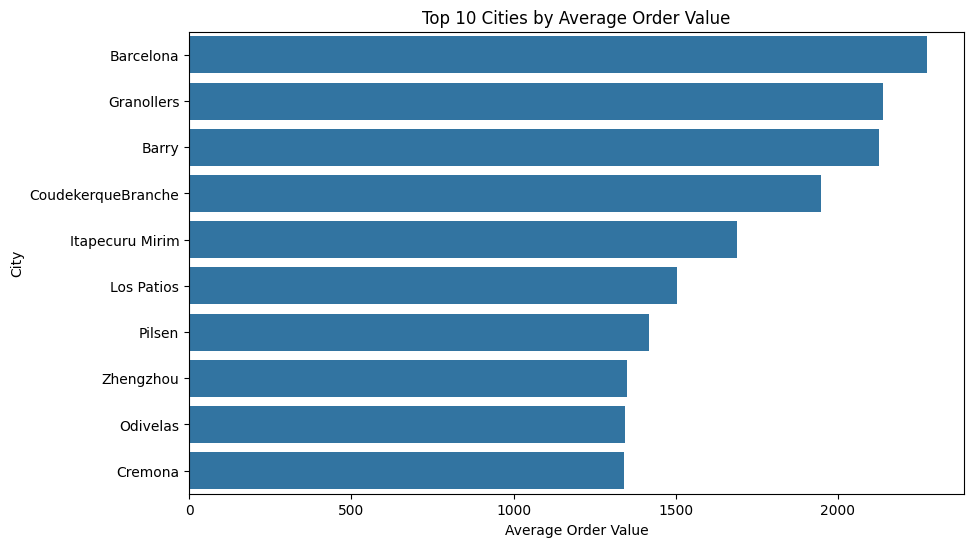

In [ ]:
# 1. تحليل الطلبات حسب الموقع الجغرافي (المنطقة، الدولة، المدينة)
orders_by_location = df.groupby(['Order_Region', 'Order_Country', 'Order_City'])['Order_Id'].count().reset_index()

# إعادة تسمية العمود ليعكس عدد الطلبات
orders_by_location = orders_by_location.rename(columns={'Order_Id': 'Order_Count'})

# عرض النتائج مرتبة تصاعديًا حسب عدد الطلبات
print(orders_by_location.sort_values(by=['Order_Count'], ascending=False))

# 2. حساب قيمة الطلبات (في حال كانت قيمة الطلب الإجمالي غير موجودة)
# نفترض أن 'Order_Item_Total' هو سعر الوحدة و'Order_Item_Quantity' هو عدد الوحدات في الطلب
df['Order_Total'] = df['Order_Item_Total'] * df['Order_Item_Quantity']

# حساب متوسط قيمة الطلب لكل موقع جغرافي
average_order_value = df.groupby(['Order_Region', 'Order_Country', 'Order_City'])['Order_Total'].mean().reset_index()

# عرض النتائج مرتبة حسب قيمة الطلب
print(average_order_value.sort_values(by=['Order_Total'], ascending=False))

# 3. تحليل المنتجات الأكثر شعبية حسب الموقع الجغرافي
# استخدام 'value_counts' لحساب تكرار المنتجات لكل موقع
popular_products = df.groupby(['Order_Region', 'Order_Country', 'Order_City'])['Product_Name'].value_counts().reset_index(name='Product_Count')

# عرض النتائج مرتبة حسب عدد المنتجات
print(popular_products.sort_values(by=['Product_Count'], ascending=False))

# رسم بياني لمتوسط قيمة الطلب حسب الموقع الجغرافي
plt.figure(figsize=(10, 6))
sns.barplot(data=average_order_value.sort_values(by='Order_Total', ascending=False).head(10),
            x='Order_Total', y='Order_City')
plt.title('Top 10 Cities by Average Order Value')
plt.xlabel('Average Order Value')
plt.ylabel('City')
plt.show()


*Plotting* actual demand and forecasting it for performance

<ipython-input-18-48acf3373b46>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order_Date'] = pd.to_datetime(df['Order_Date'])


Mean Absolute Error: 53.35090659340659


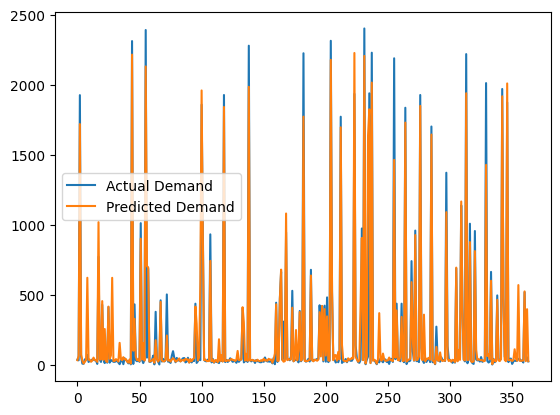

In [ ]:

# تحويل العمود الخاص بالتاريخ إلى datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# استخراج الميزات الزمنية المتقدمة
df['Order_Year'] = df['Order_Date'].dt.year
df['Order_Month'] = df['Order_Date'].dt.month
df['Order_Day'] = df['Order_Date'].dt.day
df['Order_Weekday'] = df['Order_Date'].dt.weekday  # اليوم من الأسبوع
df['Order_Quarter'] = df['Order_Date'].dt.quarter  # ربع السنة

# إضافة ميزات إضافية زي الخصومات ومخاطر التأخير
df['Late_Delivery_Risk'] = df['Late_Delivery_Risk'].fillna(0)  # التعامل مع القيم المفقودة
df['Order_Item_Discount'] = df['Order_Item_Discount'].fillna(0)  # التعامل مع القيم المفقودة

# تجميع البيانات الشهرية لكل منتج
df_grouped = df.groupby(['Order_Year', 'Order_Month', 'Product_Name']).agg({
    'Order_Item_Quantity': 'sum',
    'Product_Price': 'mean',
    'Order_Item_Discount': 'mean',
    'Late_Delivery_Risk': 'mean',
    'Shipping_Mode': 'first',  # افتراض أن أول وسيلة شحن لكل مجموعة بيانات
    'Order_Weekday': 'mean',   # اليوم من الأسبوع (الطلب المنتظم خلال الشهر)
}).reset_index()

# استخدام One-Hot Encoding لتحويل Shipping_Mode إلى أعمدة منفصلة
df_encoded = pd.get_dummies(df_grouped, columns=['Shipping_Mode'])

# تحديد الميزات الجديدة والعمود الهدف
X = df_encoded[['Order_Year', 'Order_Month', 'Order_Weekday', 'Product_Price', 'Order_Item_Discount', 'Late_Delivery_Risk'] + list(df_encoded.columns[df_encoded.columns.str.startswith('Shipping_Mode_')])]
y = df_encoded['Order_Item_Quantity']

# تقسيم البيانات إلى مجموعة تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# اختيار نموذج RandomForest
model = RandomForestRegressor()

# تدريب النموذج
model.fit(X_train, y_train)

# عمل التنبؤات على مجموعة الاختبار
y_pred = model.predict(X_test)

# حساب الـ Mean Absolute Error (MAE) لتقييم النموذج
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# رسم الطلب الفعلي والتنبؤ به لتقييم الأداء
plt.plot(y_test.values, label='Actual Demand')
plt.plot(y_pred, label='Predicted Demand')
plt.legend()
plt.show()




```
# This is formatted as code
```

Late Delivery Risk Forecasting

Accuracy: 0.9739364059384001


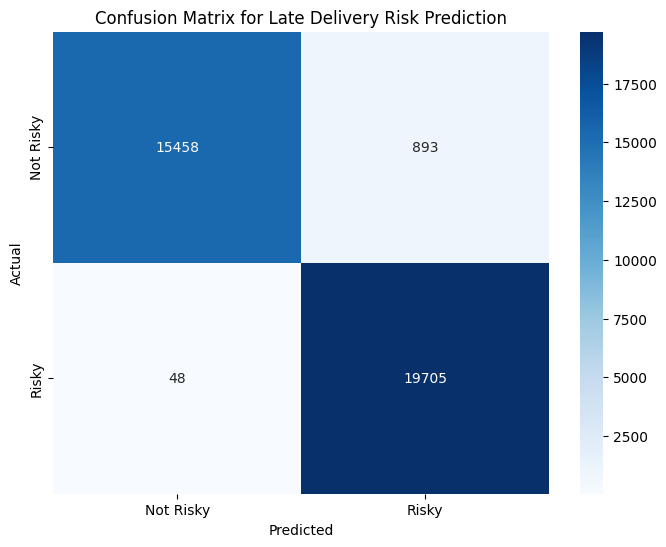

<ipython-input-23-16d8aef59214>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Late_Delivery_Risk', palette='coolwarm')


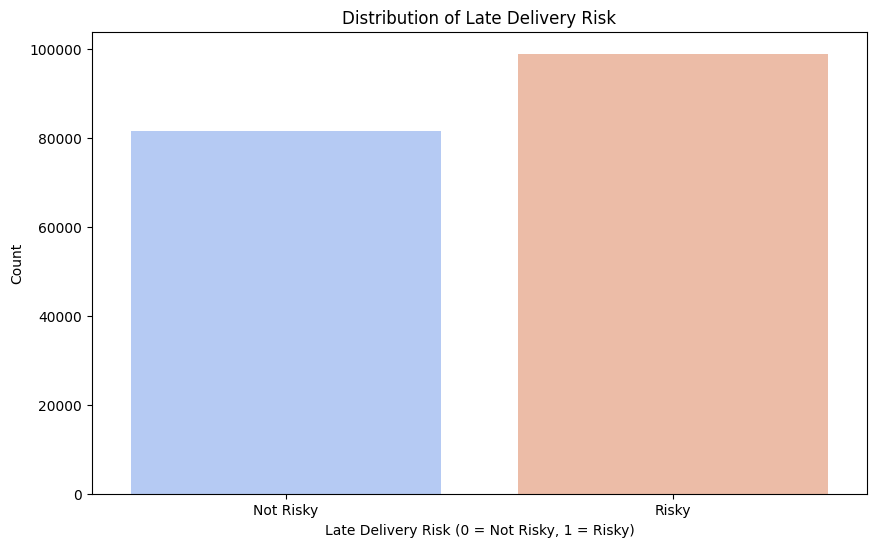

In [ ]:
# Import the necessary library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix # Import confusion_matrix from sklearn.metrics

# تحويل Late_Delivery_Risk إلى قيم عددية (1 = Risky, 0 = Not Risky)
df['Late_Delivery_Risk'] = df['Late_Delivery_Risk'].replace({'Yes': 1, 'No': 0})

# تحديد الميزات للتنبؤ بمخاطر تأخر الشحن
X = df[['Days_for_shipping_real', 'Days_for_shipment_scheduled', 'Order_Item_Quantity', 'Order_Item_Discount', 'Product_Price']]
y = df['Late_Delivery_Risk']

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تدريب نموذج RandomForestClassifier
model = RandomForestClassifier() # Now RandomForestClassifier is defined and can be used
model.fit(X_train, y_train)

# تنبؤ على مجموعة الاختبار
y_pred = model.predict(X_test)

# حساب الدقة
accuracy = accuracy_score(y_test, y_pred) # accuracy_score is now defined and can be used
print(f'Accuracy: {accuracy}')

# حساب مصفوفة الارتباك
cm = confusion_matrix(y_test, y_pred) # confusion_matrix is now defined and can be used

# رسم مصفوفة الارتباك
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Risky', 'Risky'], yticklabels=['Not Risky', 'Risky'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Late Delivery Risk Prediction')
plt.show()

# رسم بياني لتوزيع التنبؤات
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Late_Delivery_Risk', palette='coolwarm')
plt.title('Distribution of Late Delivery Risk')
plt.xlabel('Late Delivery Risk (0 = Not Risky, 1 = Risky)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Risky', 'Risky'])
plt.show()

Order Cancellation Risk Forecasting

Accuracy: 0.9219754043873255


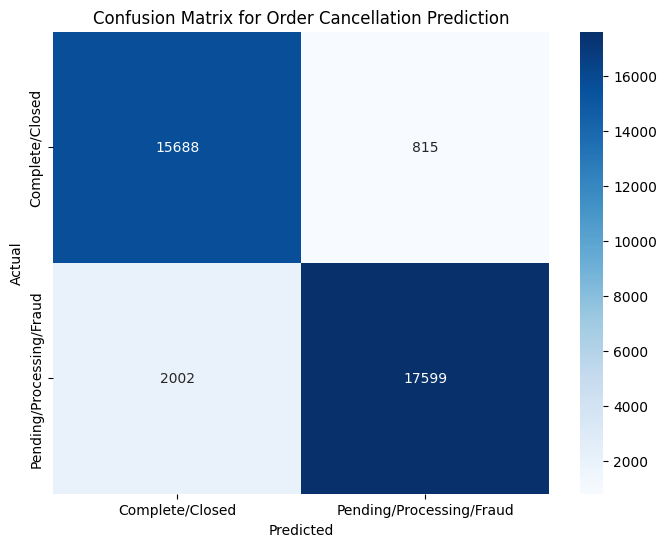

In [ ]:
# تحويل Order_Status إلى تصنيفات جديدة (Pending/Processing/Suspected Fraud = 1, Complete/Closed = 0)
# Ensuring the replaced values are integers
# Include 'ON_HOLD' and 'CANCELED' in the mapping
df['Order_Status'] = df['Order_Status'].replace({
    'PENDING_PAYMENT': 1,
    'PENDING': 1,
    'PROCESSING': 1,
    'SUSPECTED_FRAUD': 1,
    'COMPLETE': 0,
    'CLOSED': 0,
    'PAYMENT_REVIEW': 1,
    'ON_HOLD': 1,  # Assuming 'ON_HOLD' should be treated as 1 (Pending/Processing)
    'CANCELED': 0,  # Assuming 'CANCELED' should be treated as 0 (Complete/Closed) or 1 based on your logic
})

# Now you can safely convert to int after ensuring all values are numeric
df['Order_Status'] = df['Order_Status'].fillna(-1).astype(int)

# ملء القيم المفقودة في Payment_Type
df['Payment_Type'] = df['Payment_Type'].fillna('Other')

# One-Hot Encoding لعمود Payment_Type
df_encoded = pd.get_dummies(df, columns=['Payment_Type'])

# تحديد الميزات للتنبؤ بإلغاء الطلبات
# Exclude Order_Status from the features as it is the target variable
X = df_encoded[['Order_Item_Quantity', 'Order_Item_Discount', 'Product_Price'] + list(df_encoded.columns[df_encoded.columns.str.startswith('Payment_Type_')])]
y = df_encoded['Order_Status']

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تدريب نموذج RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# تنبؤ على مجموعة الاختبار
y_pred = model.predict(X_test)

# حساب الدقة
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# حساب مصفوفة الارتباك
cm = confusion_matrix(y_test, y_pred)

# رسم مصفوفة الارتباك
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Complete/Closed', 'Pending/Processing/Fraud'], yticklabels=['Complete/Closed', 'Pending/Processing/Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Order Cancellation Prediction')
plt.show()

In [ ]:
df.columns

Index(['Order_Id', 'Order_Customer_Id', 'Order_Date', 'Order_State',
       'Order_Region', 'Order_Country', 'Order_City', 'Order_Zipcode',
       'Order_Status', 'Payment_Type', 'Order_Id.1', 'Order_Item_Quantity',
       'Order_Item_Discount', 'Order_Item_Discount_Rate', 'Order_Item_Total',
       'Order_Profit_Per_Order', 'Order_Item_Profit_Ratio', 'Shipping_Mode',
       'Shipping_Date', 'Late_Delivery_Risk', 'Days_for_shipping_real',
       'Days_for_shipment_scheduled', 'Order_Id.2', 'Product_Card_Id.1',
       'Product_Name', 'Product_Price', 'Product_Category_Id', 'Category_Id',
       'Category_Name', 'Order_Year', 'Order_Month', 'Order_Day',
       'Order_Weekday', 'Order_Quarter'],
      dtype='object')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# قراءة البيانات
df = pd.read_csv('/content/SupplyChain.csv')

# تحويل حالة الطلب إلى lowercase
df['Order_Status'] = df['Order_Status'].str.lower()

# تعريف القيم الجديدة
new_var = {
    'completed': 'Completed',
    'closed': 'Completed',
    'cancelled': 'Incomplete',
    'delayed': 'Incomplete',
    'pending': 'Incomplete',
    'processing': 'Incomplete',
    'on hold': 'Incomplete',
    'returned': 'Incomplete'
}

# تطبيق القيم الجديدة
df3['Order_Status'] = df3['Order_Status'].map(new_var)

# تجميع البيانات
order_counts = df3.groupby(['Order_Country', 'Order_Status'])['Order_Id'].count().reset_index()
order_counts = order_counts.pivot(index='Order_Country', columns='Order_Status', values='Order_Id').fillna(0)

# حساب إجمالي الشحنات المكتملة وغير المكتملة
total_completed = order_counts['Completed'].sum()
total_incomplete = order_counts['Incomplete'].sum()

# حساب النسب المئوية
total_orders = total_completed + total_incomplete
completion_rate = (total_completed / total_orders) * 100
incompletion_rate = (total_incomplete / total_orders) * 100

# إعداد البيانات للرسم
rates = [completion_rate, incompletion_rate]
labels = ['Completed', 'Incomplete']

# رسم الشريط البياني للنسب العامة
plt.bar(labels, rates, color=['green', 'red'])
plt.xlabel('Order Status')
plt.ylabel('Rate (%)')
plt.title('Overall Completion vs Incompletion Rate')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# رسم الشحنات غير المكتملة لكل دولة
plt.figure(figsize=(10, 6))
order_counts[order_counts['Incomplete'] > 0].sort_values(by='Incomplete', ascending=False).plot(kind='bar', y='Incomplete', legend=False)
plt.xlabel('Order Country')
plt.ylabel('Number of Incomplete Orders')
plt.title('Incomplete Orders by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'Order_Status'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/SupplyChain.csv')

# Convert 'Order_Status' to lowercase for case-insensitive mapping
df['Order_Status'] = df['Order_Status'].str.lower()

new_var = {'completed': 'Completed', 'closed': 'Completed',
           'cancelled': 'Incomplete', 'delayed': 'Incomplete',
           'pending': 'Incomplete', 'processing': 'Incomplete',
           'on hold': 'Incomplete', 'returned': 'Incomplete'}

df['Order_Status'] = df['Order_Status'].map(new_var)

order_counts = df.groupby(['Order_Country', 'Order_Status'])['Order_Id'].count().reset_index()

order_counts = order_counts.pivot(index='Order_Country', columns='Order_Status', values='Order_Id').fillna(0)

# Calculate total completion and incompletion rates
total_completed = order_counts['Completed'].sum()
total_incomplete = order_counts['Incomplete'].sum()

# Calculate percentages
total_orders = total_completed + total_incomplete
completion_rate = (total_completed / total_orders) * 100
incompletion_rate = (total_incomplete / total_orders) * 100

# Data for plotting
rates = [completion_rate, incompletion_rate]
labels = ['Completed', 'Incomplete']

# Plot the bar chart with two bars
plt.bar(labels, rates, color=['green', 'red'])

plt.xlabel('Order Status')
plt.ylabel('Rate (%)')
plt.title('Overall Completion vs Incompletion Rate')
plt.ylim(0, 100)  # Limit y-axis to 100%
plt.tight_layout()
plt.show()


KeyError: 'Order_Status'

<ipython-input-25-4172907671d7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Order_Date'] = pd.to_datetime(product_data['Order_Date'], format='%d/%m/%Y')
<ipython-input-25-4172907671d7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Month'] = product_data['Order_Date'].dt.month


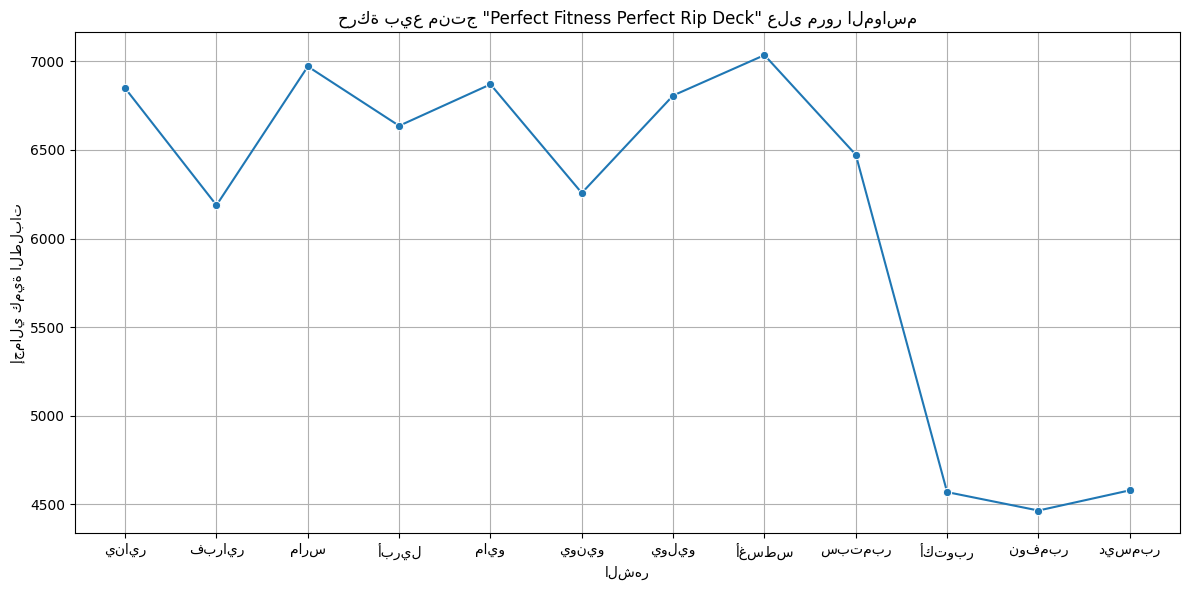

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# تصفية البيانات للمنتج المحدد
product_data = df[df['Product_Name'] == 'Perfect Fitness Perfect Rip Deck']

# تحويل عمود التاريخ إلى نوع بيانات datetime
# The original format was incorrect. It should be '%d/%m/%Y' for day/month/year
product_data['Order_Date'] = pd.to_datetime(product_data['Order_Date'], format='%d/%m/%Y')

# استخراج الشهر من عمود التاريخ
product_data['Month'] = product_data['Order_Date'].dt.month

# تجميع البيانات حسب الشهر وحساب إجمالي كمية الطلبات
monthly_sales = product_data.groupby('Month')['Order_Item_Quantity'].sum().reset_index()

# إنشاء مخطط خطي لعرض حركة المبيعات على مدار الأشهر
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Order_Item_Quantity', data=monthly_sales, marker='o')
plt.title('حركة بيع منتج "Perfect Fitness Perfect Rip Deck" على مرور المواسم')
plt.xlabel('الشهر')
plt.ylabel('إجمالي كمية الطلبات')
plt.xticks(range(1, 13), ['يناير', 'فبراير', 'مارس', 'أبريل', 'مايو', 'يونيو', 'يوليو', 'أغسطس', 'سبتمبر', 'أكتوبر', 'نوفمبر', 'ديسمبر'])
plt.grid(True)
plt.tight_layout()
plt.show()